In [1]:
# Data Manipulation and Visualization libs
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing modules
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Pipline Utilities
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

# Model Evaluation and Selection Tools
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [2]:
# Load training data
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')

# Load test data
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Data Manipulation and Feature Engineering

New Features:
1. FamilySize, FamilySizeGroup
2. NameLen, NameLenCut, NameSize, Title
3. Age_Cut,AgeGroup 
4. FareCut, FareGroup
5. CabinAssigned
6. TicketNumber, TicketNumberCounts, TicketLocation

In [3]:
# General info on the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# info on object (string) data types: O alias for object
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
train_df.groupby(['Pclass'], as_index=False)["Survived"].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Axes: xlabel='Pclass', ylabel='Survived'>

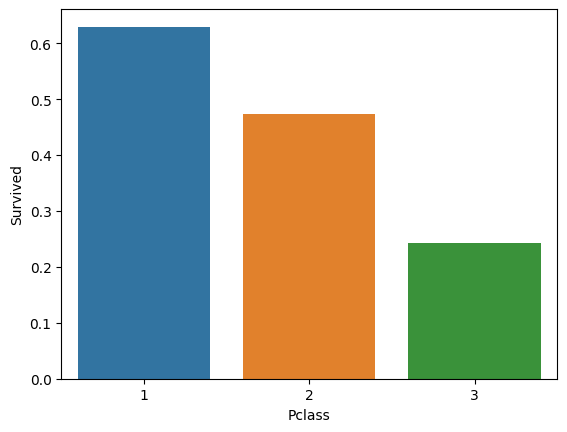

In [8]:
sns.barplot(data=train_df, x="Pclass", y="Survived", errorbar=None)

In [9]:
train_df.groupby(["Sex"], as_index=False)["Survived"].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df.groupby(["SibSp"], as_index=False)["Survived"].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### 1st feature: FamilySize, FamilySizeGroup 

In [11]:
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1

In [12]:
train_df.groupby(["FamilySize"], as_index=False)["Survived"].mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [13]:
family_map = {1:"Alone" , 2:"Small", 3:"Small", 4:"Small", 5:"Medium", 6:"Medium", 7:"Large", 8:"Large", 11:"Large" }

train_df["FamilySizeGrouped"] = train_df["FamilySize"].map(family_map)
test_df["FamilySizeGrouped"] = test_df["FamilySize"].map(family_map)

In [14]:
train_df.groupby(['FamilySizeGrouped'], as_index=False)['Survived'].mean()

,FamilySizeGrouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


<Axes: xlabel='FamilySizeGrouped', ylabel='Survived'>

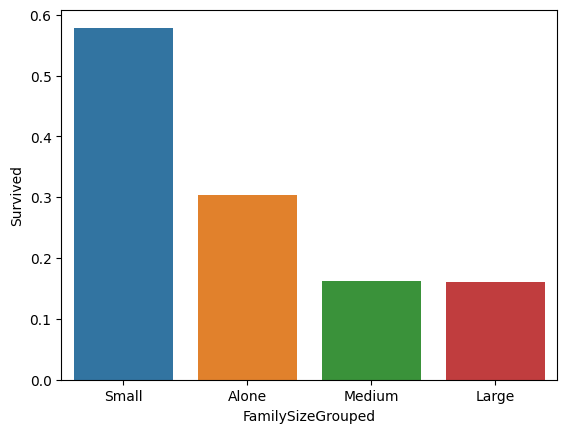

In [15]:
sns.barplot(data=train_df, x="FamilySizeGrouped", y="Survived", errorbar=None)

### 2nd Feature: NameLen, NameLenCut, NameSize

In [16]:
train_df["NameLen"] = train_df["Name"].apply(lambda x: len(x))
test_df["NameLen"] = test_df["Name"].apply(lambda x: len(x))

In [17]:
train_df["NameLenCut"] = pd.qcut(train_df["NameLen"], 3)
test_df["NameLenCut"] = pd.qcut(test_df["NameLen"], 3)

In [18]:
train_df.groupby("NameLenCut", as_index=False, observed=True)["Survived"].mean()

,NameLenCut,Survived
0,"(11.999, 22.0]",0.252336
1,"(22.0, 28.0]",0.322581
2,"(28.0, 82.0]",0.587629


In [19]:
train_df["NameSize"] = pd.cut(train_df["NameLen"], bins=[0,22,28,82, float('inf')], labels=[0,1,2,3], right=False).astype(int)
test_df["NameSize"] = pd.cut(test_df["NameLen"], bins=[0,22,28,82,float('inf')], labels=[0,1,2,3], right=False).astype(int)

In [20]:
train_df.groupby("NameSize", as_index=False, observed=True)["Survived"].mean()

,NameSize,Survived
0,0,0.243816
1,1,0.313869
2,2,0.558559
3,3,1.000000


In [21]:
#  Title
# Using regex to extract titles
pattern = r',\s*([^\.]+)\.'
train_df['Title'] = train_df['Name'].str.extract(pattern, expand=False)
test_df['Title'] = test_df['Name'].str.extract(pattern, expand=False)

In [22]:
train_df['Title'] = train_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})

test_df['Title'] = test_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})

In [23]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Noble', 'Rev', 'Dr', 'Military'],
      dtype=object)

In [24]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


### 3rd Feature: AgeCut, AgeGroup

In [25]:
train_df["Age"] = train_df["Age"].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

In [26]:
train_df["AgeCut"] = pd.qcut(train_df['Age'], 5) 
test_df["AgeCut"] = pd.qcut(test_df['Age'], 5) 

In [27]:
train_df.groupby("AgeCut", as_index=False, observed=True)["Survived"].mean()

,AgeCut,Survived
0,"(0.419, 20.0]",0.458101
1,"(20.0, 28.0]",0.360656
2,"(28.0, 29.699]",0.301508
3,"(29.699, 38.0]",0.444444
4,"(38.0, 80.0]",0.372881


In [28]:
# group age into categories
train_df["AgeGroup"] = pd.cut(train_df['Age'], bins=[0, 19, 25, 31, 41, 80, float('inf')], labels=[0, 1, 2, 3, 4, 5], right=False).astype(int)
test_df["AgeGroup"] = pd.cut(test_df['Age'], bins=[0, 19, 25, 31, 41, 80, float('inf')], labels=[0, 1, 2, 3, 4, 5],right=False).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilySizeGrouped,NameLen,NameLenCut,NameSize,Title,AgeCut,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,23,"(22.0, 28.0]",1,Mr,"(20.0, 28.0]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,51,"(28.0, 82.0]",2,Mrs,"(29.699, 38.0]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,22,"(11.999, 22.0]",1,Miss,"(20.0, 28.0]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,44,"(28.0, 82.0]",2,Mrs,"(29.699, 38.0]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,24,"(22.0, 28.0]",1,Mr,"(29.699, 38.0]",3


In [29]:
train_df.groupby("AgeGroup", as_index=False, observed=True)["Survived"].mean()

,AgeGroup,Survived
0,0,0.503597
1,1,0.345324
2,2,0.322581
3,3,0.445161
4,4,0.367347
5,5,1.000000


### 4th Feature: FareCut, FareGroup 

In [30]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

In [31]:
train_df["FareCut"] = pd.qcut(train_df['Fare'], 5) 
test_df["FareCut"] = pd.qcut(test_df['Fare'], 5) 

In [32]:
train_df.groupby("FareCut", as_index=False, observed=True)["Survived"].mean()

,FareCut,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [33]:
train_df["Fare"] = train_df["Fare"].fillna(train_df['Fare'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

In [34]:
train_df["FareGroup"] = pd.cut(train_df['Fare'], bins=[0, 7.8554, 10.5, 21.679, 39.688,  512.329, float('inf')], labels=[0, 1, 2, 3, 4, 5], right=False).astype(int)
test_df["FareGroup"] = pd.cut(test_df['Fare'], bins=[0, 7.8554, 10.5, 21.679, 39.688,  512.329, float('inf')], labels=[0, 1, 2, 3, 4, 5],right=False).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,FamilySizeGrouped,NameLen,NameLenCut,NameSize,Title,AgeCut,AgeGroup,FareCut,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,2,Small,23,"(22.0, 28.0]",1,Mr,"(20.0, 28.0]",1,"(-0.001, 7.854]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,2,Small,51,"(28.0, 82.0]",2,Mrs,"(29.699, 38.0]",3,"(39.688, 512.329]",4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,Alone,22,"(11.999, 22.0]",1,Miss,"(20.0, 28.0]",2,"(7.854, 10.5]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,2,Small,44,"(28.0, 82.0]",2,Mrs,"(29.699, 38.0]",3,"(39.688, 512.329]",4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,Alone,24,"(22.0, 28.0]",1,Mr,"(29.699, 38.0]",3,"(7.854, 10.5]",1


In [35]:
train_df.groupby("FareGroup", as_index=False, observed=True)["Survived"].mean()

,FareGroup,Survived
0,0,0.217877
1,1,0.175000
2,2,0.420513
3,3,0.441989
4,4,0.635838
5,5,1.000000


### 5th Feature: CabinAssigned

In [36]:
train_df["Cabin"] = train_df["Cabin"].fillna("U")
train_df["Cabin"] = pd.Series([i[0] for i in train_df["Cabin"]])

test_df["Cabin"] = test_df["Cabin"].fillna("U")
test_df["Cabin"] = pd.Series([i[0] for i in test_df["Cabin"]])

In [37]:
train_df.groupby(["Cabin"], as_index=False)["Survived"].agg(["count","mean"])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [38]:
train_df["CabinAssigned"] = train_df["Cabin"].apply(lambda x: 0 if x in ['U'] else 1)
test_df["CabinAssigned"] = test_df["Cabin"].apply(lambda x: 0 if x in ['U'] else 1)

In [39]:
train_df.groupby("CabinAssigned", as_index=False, observed=True)["Survived"].mean()

,CabinAssigned,Survived
0,0,0.299854
1,1,0.666667


### 6th Feature: TicketNumber, TicketNumberCounts, TicketLocation

In [40]:
train_df["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [41]:
train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test_df['TicketNumber'] = test_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [42]:
train_df.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [43]:
train_df['TicketNumberCounts'] = train_df.groupby("TicketNumber")["TicketNumber"].transform("count")
test_df['TicketNumberCounts'] = test_df.groupby("TicketNumber")["TicketNumber"].transform("count")

In [44]:
# train_df['TicketLocation']

In [45]:
test_df.shape

(418, 24)

In [46]:
train_df.shape

(891, 25)

In [47]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         418 non-null    int64   
 1   Pclass              418 non-null    int64   
 2   Name                418 non-null    object  
 3   Sex                 418 non-null    object  
 4   Age                 418 non-null    float64 
 5   SibSp               418 non-null    int64   
 6   Parch               418 non-null    int64   
 7   Ticket              418 non-null    object  
 8   Fare                418 non-null    float64 
 9   Cabin               418 non-null    object  
 10  Embarked            418 non-null    object  
 11  FamilySize          418 non-null    int64   
 12  FamilySizeGrouped   418 non-null    object  
 13  NameLen             418 non-null    int64   
 14  NameLenCut          418 non-null    category
 15  NameSize            418 non-null    int6

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    object  
 5   Age                 891 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               891 non-null    object  
 11  Embarked            889 non-null    object  
 12  FamilySize          891 non-null    int64   
 13  FamilySizeGrouped   891 non-null    object  
 14  NameLen             891 non-null    int64   
 15  NameLenCut          891 non-null    cate

<Axes: >

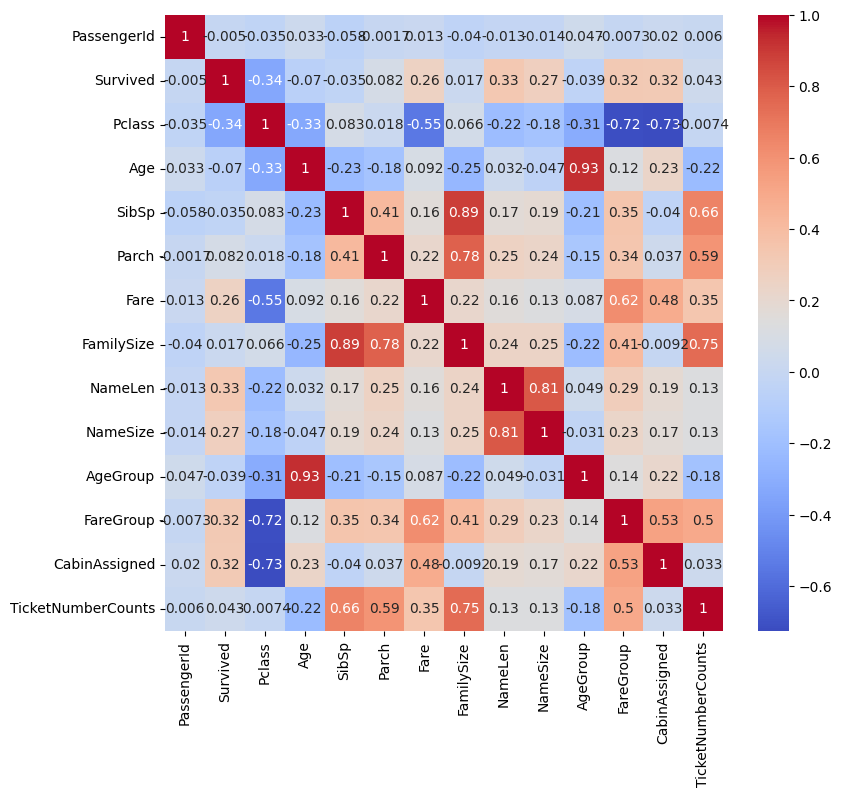

In [49]:
correlation_mat = train_df.corr(numeric_only=True)

plt.figure(figsize=(9,8))
sns.heatmap(correlation_mat, cmap="coolwarm", annot=True)

## Data preprocessing
1. ohe: sex, embarked
2. ode: familySizeGroup


In [50]:
# using sparse_output will help store only position with none zero in a matrix instead of storing all info in a numpy array
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output=False)

ode = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

SI = SimpleImputer(strategy="most_frequent")

In [51]:
ode_cols = ["FamilySizeGrouped"]
ohe_cols = ["Sex", "Embarked"]

In [52]:
X = train_df.drop(["Survived", "Parch", "SibSp"], axis=1)
y = train_df["Survived"]
X_test = test_df.drop(["Parch", "SibSp", "AgeCut", "FareCut"], axis=1)

In [53]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify = y, random_state=21)

## Pipline

In [58]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,...,NameLenCut,NameSize,Title,AgeCut,AgeGroup,FareCut,FareGroup,CabinAssigned,TicketNumber,TicketNumberCounts
0,1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,U,S,2,...,"(22.0, 28.0]",1,Mr,"(20.0, 28.0]",1,"(-0.001, 7.854]",0,0,21171,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,C,2,...,"(28.0, 82.0]",2,Mrs,"(29.699, 38.0]",3,"(39.688, 512.329]",4,1,17599,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,U,S,1,...,"(11.999, 22.0]",1,Miss,"(20.0, 28.0]",2,"(7.854, 10.5]",1,0,3101282,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C,S,2,...,"(28.0, 82.0]",2,Mrs,"(29.699, 38.0]",3,"(39.688, 512.329]",4,1,113803,2
4,5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,U,S,1,...,"(22.0, 28.0]",1,Mr,"(29.699, 38.0]",3,"(7.854, 10.5]",1,0,373450,1


In [54]:
ordinal_pipeline = Pipeline( steps =[
        ("impute", SI),
        ("ord", ode)
]
)

In [55]:
onehot_pipeline = Pipeline(steps =[
    ("impute", SI),
    ("oh", ohe)
])

In [59]:
cols_trans = ColumnTransformer( transformers = [
    ("ohe_pipeline", onehot_pipeline, ohe_cols),
    ("ode_pipeline", ordinal_pipeline, ode_cols),
    ('passthrough', 'passthrough', ['Pclass', 'CabinAssigned', 'NameSize', 'Age', 'Fare', 'TicketNumberCounts', 'FareGroup', 'AgeGroup']),
   ],
   remainder = "drop",
   n_jobs=-1
)

### Random Forest Model

In [61]:
rfc = RandomForestClassifier()

In [62]:
param_grid = {
    "n_estimators": [100,150,200,300,500],
    "min_samples_split": [10,15,20],
    "max_depth":[10,13,15,17,20],
    "min_samples_leaf": [2,4,5,6],
    "criterion": ["gini","entropy"]
}

In [63]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [65]:
pipeline_rfc = make_pipeline(cols_trans, CV_rfc)
pipeline_rfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oh',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('ode_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEnc...
                                                   'NameSize', 'Age', 'Fare',
                                                   'TicketNumberCounts',
                                                   'FareGroup',
                                                   'AgeGroup'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 13, 15, 17, 20],
                                          'min_samples_leaf': [2, 4, 5, 6],
                                          'min_samples_split': [10, 15, 20],
                                          'n_estimators': [100, 150, 200, 300,
                                                           500]}))])

In [66]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
0.8356938835812076


### Decision Tree Model

In [67]:
dtc = DecisionTreeClassifier()

In [68]:
param_grid_dtc = {
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [69]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid_dtc, cv=StratifiedKFold(n_splits=5))

In [71]:
pipeline_dtc = make_pipeline(cols_trans,CV_dtc)
pipeline_dtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oh',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('ode_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEnc...
                                                  ['Pclass', 'CabinAssigned',
                                                   'NameSize', 'Age', 'Fare',
                                                   'TicketNumberCounts',
                                                   'FareGroup',
                                                   'AgeGroup'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [72]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 15}
0.8145769723234514


### K Neighbor Model

In [73]:
knn = KNeighborsClassifier()

In [79]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 22],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2],
}

In [80]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=StratifiedKFold(n_splits=5))

In [81]:
pipeline_knn = make_pipeline(cols_trans, CV_knn)
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oh',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('ode_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEnc...
                                                  ['Pclass', 'CabinAssigned',
                                                   'NameSize', 'Age', 'Fare',
                                                   'TicketNumberCounts',
                                                   'FareGroup',
                                                   'AgeGroup'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11, 22],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [82]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.7724711907810499


Support Vector Classifier Model

In [83]:
svc = SVC(probability=True)

In [84]:
param_grid_svc = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid']
}

In [85]:
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=StratifiedKFold(n_splits=5))

In [86]:
pipeline_svc = make_pipeline(cols_trans, CV_svc)
pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oh',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('ode_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEnc...
                                                  ['FamilySizeGrouped']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'CabinAssigned',
                                                   'NameSize', 'Age', 'Fare',
                                                   'TicketNumberCounts',
                                                   'FareGroup',
                                                   'AgeGroup'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(probability=True),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [87]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 100, 'kernel': 'rbf'}
0.8075839653304442


### Making Submission

In [88]:
Y_pred1 = pipeline_rfc.predict(X_test)
Y_pred2 = pipeline_dtc.predict(X_test)
Y_pred3 = pipeline_knn.predict(X_test)
Y_pred4 = pipeline_svc.predict(X_test)

In [89]:
submission1 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred1
})

submission2 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred2
})

submission3 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred3
})

submission4 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred4
})


In [91]:
submission1.to_csv('/kaggle/working/submission24_1.csv', index=False)
submission2.to_csv('/kaggle/working/submission24_2.csv', index=False)
submission3.to_csv('/kaggle/working/submission24_3.csv', index=False)
submission4.to_csv('/kaggle/working/submission24_4.csv', index=False)